In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


In [ ]:
import zipfile
zip_reg = zipfile.ZipFile('dogs-vs-cats.zip','r')
zip_reg.extractall('/content/drive/MyDrive/Deep Learning/Cat Dog Classifier/datasets')
zip_reg.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, BatchNormalization, Dropout
from keras.regularizers import l1,l2

In [ ]:
#generaters :- data divided into batches to process
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Deep Learning/Cat Dog Classifier/datasets/train',
    labels = 'inferred',
    label_mode = 'int', # cat = 0 dog = 1
    batch_size = 32,
    image_size = (256,256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Deep Learning/Cat Dog Classifier/datasets/test',
    labels = 'inferred',
    label_mode = 'int', # cat = 0 dog = 1
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalizq
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#create own cnn model
model = Sequential()

model.add(Conv2D(32,kernel_size=(6,6), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(6,6), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(6,6), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))


model.add(Conv2D(256,kernel_size=(6,6), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 251, 251, 32)        │           3,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 251, 251, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 125, 125, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 120, 120, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 120, 120, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 59, 59, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 54, 54, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 54, 54, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 21, 21, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      13,107,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,793,441 (56.43 MB)

 Trainable params: 14,792,481 (56.43 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 257s 377ms/step - accuracy: 0.5437 - loss: 2.2203 - val_accuracy: 0.6164 - val_loss: 0.6611
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 187ms/step - accuracy: 0.6556 - loss: 0.6260 - val_accuracy: 0.5208 - val_loss: 1.1204
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 191ms/step - accuracy: 0.7305 - loss: 0.5281 - val_accuracy: 0.7696 - val_loss: 0.4703
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 188ms/step - accuracy: 0.8093 - loss: 0.4076 - val_accuracy: 0.6506 - val_loss: 0.6849
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 187ms/step - accuracy: 0.8678 - loss: 0.3095 - val_accuracy: 0.8576 - val_loss: 0.3208
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 193ms/step - accuracy: 0.9055 - loss: 0.2330 - val_accuracy: 0.8596 - val_loss: 0.3381
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 187ms/step - accuracy: 0.9267 - loss: 0.1798 - val_accuracy: 0.8372 - val_loss: 0.4708
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 192ms/step - accuracy: 0.9387 -

In [ ]:
model.save('/content/drive/MyDrive/Deep Learning/Cat Dog Classifier/Cat_dog_Classifier_Model.h5')

In [5]:
import cv2

In [24]:
test_img = cv2.imread("/content/drive/MyDrive/Deep Learning/Cat Dog Classifier/dog.jfif")

In [26]:
import matplotlib.pyplot as plt

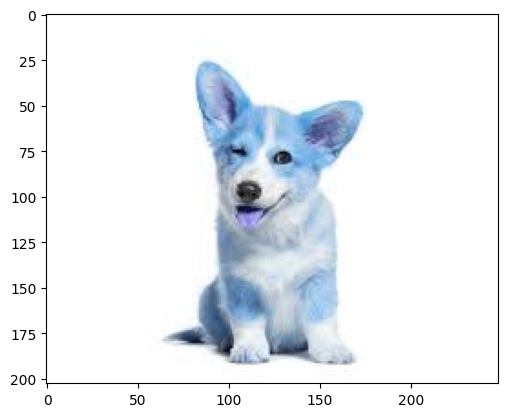

In [27]:
plt.imshow(test_img)

In [28]:
test_img.shape

(203, 248, 3)

In [30]:
test_img = cv2.resize(test_img,(256,256))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
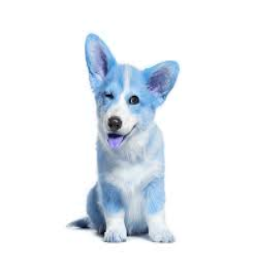

In [31]:
test_img

In [32]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)